# Class methods. Parameter self
# Методы классов. Параметр self

Как уже говорилось ранее, класс может содержать свойства (данные) и методы (функции). Благодаря методам внутри класса можно реализовывать самые разные алгоритмы, то есть методы – это действия. Именно поэтому, в названиях методов используют глаголы, например:

set_value, get_param, start, stop, и т.п.

В то время как именами свойств (данных) выступают существительные:

color, size, x, y, и т.п.

Рекомендуется придерживаться этого простого правила.

Давайте, для примера объявим метод set_coords в классе Point, который будет просто выводить в консоль сообщение «вызов метода set_coords»:

In [1]:
class Point:
    color = 'red'
    circle = 2
 
    def set_coords(self):
        print("вызов метода set_coords")

Здесь сразу бросается в глаза вот этот параметр self, который автоматически прописывает интегрированная среда. Зачем он здесь, если мы пока ничего не собираемся передавать этому методу? Давайте его уберем! Пока никаких проблем не возникло. Мало того, мы можем его вызвать из класса Point:

In [2]:
Point.set_coords()

TypeError: Point.set_coords() missing 1 required positional argument: 'self'

и все будет работать без ошибок. Здесь мы видим, как вызываются методы класса. Все довольно очевидно. Записываем имя класса (Point), и через точку указываем имя метода. В конце обязательно прописываем круглые скобки, так как это оператор вызова функций. И, так как метод – это функция класса, то для вызова метода используется тот же оператор, что и для вызова функций.

В результате, мы получили класс, в котором два свойства и один метод. Далее, создадим экземпляр этого класса:

In [ ]:
pt = Point()

И, как мы с вами говорили, через объект pt можно обращаться ко всем атрибутам класса Point, в том числе и к методу set_coords:

In [ ]:
pt.set_coords

Этот атрибут ссылается на объект-функцию, которую мы определили в классе Point. Попробуем ее вызвать:

pt.set_coords()

Видим ошибку, что в метод set_coords при вызове передается один аргумент, а он у нас определен без параметров. Дело в том, что когда мы вызываем методы класса через его объекты, то интерпретатор Python автоматически добавляет первым аргументом ссылку на объект, из которого этот метод вызывается.

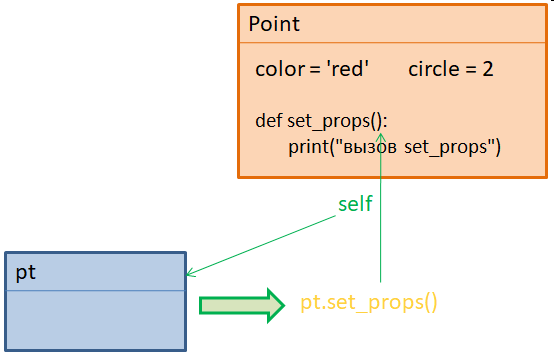

Поэтому, если мы хотим внутри класса определить метод, который можно было бы вызывать из его экземпляров, то дополнительно прописывается первый параметр, обычно, с именем self:

In [3]:
class Point:
    color = 'red'
    circle = 2
 
    def set_coords(self):
        print("вызов метода set_coords " + str(self))

Внутри метода класса мы можем ссылаться на экземпляр с помощью специального аргумента, который условно называется self. self всегда является первым атрибутом метода экземпляра.

Еще раз, параметр self будет ссылаться на экземпляр класса, из которого вызывается метод. Зачем это надо? Сейчас узнаете. После этого дополнения мы уже не сможем вызвать данный метод через класс без указания первого аргумента:

In [4]:
Point.set_coords()

TypeError: Point.set_coords() missing 1 required positional argument: 'self'

но можем через его объекты:

In [6]:
pt.set_coords()

NameError: name 'pt' is not defined

То есть, когда метод вызывается через класс, то Python автоматически не подставляет никаких аргументов. А когда вызов идет через экземпляры класса, то первый аргумент – это всегда ссылка на экземпляр. Данный момент нужно знать и помнить.

Но мы все же можем вызвать метод set_coords и через класс, если явно передадим ссылку на объект pt, следующим образом:

In [ ]:
Point.set_coords(pt)

Именно это на автомате делает Python, когда вызов осуществляется через объекты классов.

Так зачем понадобилось такое поведение? Дело в том, что метод класса – это тоже его атрибут и когда создаются экземпляры класса, то метод становится общим для всех объектов и не копируется в них. Фактически, только благодаря параметру self мы «знаем» какой объект вызвал данный метод и можем организовать с ним обратную связь.

Например, пусть метод set_coords задает координаты точек для текущего объекта. Тогда, мы пропишем в нем два дополнительных параметра и через self в самом экземпляре класса создадим (либо переопределим) два свойства:

In [ ]:
class Point:
    color = 'red'
    circle = 2
 
    def set_coords(self, x, y):
        self.x = x
        self.y = y

В результате, при вызове метода:

In [7]:
pt.set_coords(1, 2)
print(pt.__dict__)

NameError: name 'pt' is not defined

в объекте pt будут созданы два свойства x, y со значениями 1 и 2. Вот для чего нужен этот параметр self. Если в программе создать еще один объект:

In [ ]:
pt2 = Point()

и через него вызвать тот же самый метод:

In [ ]:
pt2.set_coords(10, 20)
print(pt2.__dict__)

То увидим, что свойства x, y со значениями 10 и 20 были созданы только в нем (в его пространстве имен) и никак не связаны с координатами другого объекта pt или классом Point. То есть, через self мы работаем с конкретным объектом, из которого был вызван данный метод.

Конечно, в классах мы можем прописывать произвольное количество методов. Например, определим еще один, который будет возвращать координаты точки в виде кортежа значений:

In [ ]:
class Point:
    color = 'red'
    circle = 2
 
    def set_coords(self, x, y):
        self.x = x
        self.y = y
 
    def get_coords(self):
        return (self.x, self.y)

И ниже в программе можем вызвать его:

In [ ]:
print(pt.get_coords())

Интересно, что так как имя метода – это атрибут класса, то мы можем обратиться к нему через знакомую нам уже функцию:

In [ ]:
res = getattr(pt, 'get_coords')
print(res)

Видим, что это ссылка на объект-функцию. А раз так, то ничто нам не мешает ее здесь вызывать:

In [ ]:
print(res())

Конечно, так делают очень редко. Обычно используют синтаксис через точку. Я привел это, чтобы еще раз подчеркнуть, что имена методов – это те же самые атрибуты, просто они ведут не на данные, а на функции. Во всем остальном они схожи с атрибутами-данными класса.

# Заключение

Итак, на этом занятии вы должны были узнать, как определяются простые методы класса, за что отвечает параметр self и как происходит обращение к методам и их вызов. Если все это понятно, то смело переходите к следующему занятию, где мы продолжим эту тему.

# Вопросы

1. Что называется методом класса?

Выберите один вариант из списка

Любая (не статическая) функция, объявленная внутри класса

Переменные и функции внутри класса

Такого термина в ООП нет

Любая переменная, объявленная внутри класса

In [ ]:
Любая (не статическая) функция, объявленная внутри класса

2. Что называют атрибутами класса?

Выберите один вариант из списка


Только переменные класса

Только методы класса

Экземпляры (объекты) класса

Переменные и имена методов (ссылки на методы) класса

In [ ]:
Переменные и имена методов (ссылки на методы) класса

3. Какую роль играет параметр self в методах класса?

Выберите один вариант из списка

это ссылка на объект класса, из которого был вызван метод

это ссылка на класс, которому принадлежит метод

это ссылка на текущий метод класса

это просто обязательный (зарезервированный) параметр для методов класса, через который можно передавать произвольные данные

In [ ]:
это ссылка на текущий метод класса

4. Объявите класс с именем MediaPlayer с двумя методами:

open(file) - для открытия медиа-файла с именем file (создает локальное свойство filename со значением аргумента file в объекте класса MediaPlayer)
play() - для воспроизведения медиа-файла (выводит на экран строку "Воспроизведение <название медиа-файла>")

Создайте два экземпляра этого класса с именами: media1 и media2. Вызовите из них метод open() с аргументом "filemedia1" для объекта media1 и "filemedia2" для объекта media2. После этого вызовите через объекты метод play(). При этом, на экране должно отобразиться две строки (без кавычек):

"Воспроизведение filemedia1"

"Воспроизведение filemedia2"

In [1]:
class MediaPlayer:
    
    def open(self, file):
        self.filename = file
        
    def play(self):
        print("Воспроизведение", self.filename)
        
media1 = MediaPlayer()
media2 = MediaPlayer()

media1.open("filemedia1")
media2.open("filemedia2")

media1.play()
media2.play()

Воспроизведение filemedia1
Воспроизведение filemedia2


5. Объявите класс с именем Graph и методами:

set_data(data) - передача набора данных data для последующего отображения (data - список числовых данных);
draw() - отображение данных (в том же порядке, что и в списке data)

и атрибутом:

LIMIT_Y = [0, 10]

Метод set_data() должен формировать локальное свойство data объекта класса Graph. Атрибут data должен ссылаться на переданный в метод список. Метод draw() должен выводить на экран список в виде строки из чисел, разделенных пробелами и принадлежащие заданному диапазону атрибута LIMIT_Y (границы включаются).

Создайте объект graph_1 класса Graph, вызовите для него метод set_data() и передайте список:

[10, -5, 100, 20, 0, 80, 45, 2, 5, 7]

Затем, вызовите метод draw() через объект graph_1. На экране должна появиться строка с соответствующим набором чисел, записанных через пробел. Например (вывод без кавычек):

"10 0 2 5 7"

In [2]:
class Graph:
    
    LIMIT_Y = [0, 10]
    
    def set_data(self, data):
        self.data = data 
    
    def draw(self):
        print(" ".join(str(x) for x in self.data if self.LIMIT_Y[0] <= x <= self.LIMIT_Y[1]))
graph_1 = Graph()
graph_1.set_data([10, -5, 100, 20, 0, 80, 45, 2, 5, 7])
graph_1.draw()

10 0 2 5 7


6. Имеется следующий класс:
```
class Tasks:
    def next_task(self):
        return "Следующее задание"
```
И создается объект этого класса:
```
my_t = Tasks()
```
Выберите все верные варианты вызова метода next_task()

my_t.next_task()

Tasks.my_t.next_task()

next_task(my_t)

next_task(Tasks)

Tasks.next_task(my_t)

my_t.next_task(Tasks)

In [ ]:
my_t.next_task()
Tasks.next_task(my_t)

7. Имеется следующий класс для считывания информации из входного потока:
```
import sys


class StreamReader:
    FIELDS = ('id', 'title', 'pages')

    def readlines(self):
        lst_in = list(map(str.strip, sys.stdin.readlines()))  # считывание списка строк из входного потока
        sd = StreamData()
        res = sd.create(self.FIELDS, lst_in)
        return sd, res
```
Которым, затем, можно воспользоваться следующим образом:
```
sr = StreamReader()
data, result = sr.readlines()
```
Необходимо перед классом StreamReader объявить еще один класс StreamData с методом:

def create(self, fields, lst_values): ...

который бы на входе получал кортеж FIELDS из названий локальных атрибутов (передается в атрибут fields) и список строк lst_in (передается в атрибут lst_values) и формировал бы в объекте класса StreamData локальные свойства с именами полей из fields и соответствующими значениями из lst_values.

Если создание локальных свойств проходит успешно, то метод create() возвращает True, иначе - False. Если число полей и число строк не совпадает, то метод create() возвращает False и локальные атрибуты создавать не нужно.

P.S. В программе нужно дополнительно объявить только класс StreamData. Больше ничего делать не нужно.

https://stackoverflow.com/questions/5549141/how-to-finish-sys-stdin-readlines-input

In [1]:
import sys

class StreamData:
    def create(self, fields, lst_values):
        if len(fields) != len(lst_values):  # Проверка совпадения числа полей и значений
            return False

        else:
            for field, value in zip(fields, lst_values):
                setattr(self, field, value)  # Создание локального свойства с именем поля и значением из lst_values

        return True

class StreamReader:
    FIELDS = ('id', 'title', 'pages')

    def readlines(self):
        lst_in = list(map(str.strip, sys.stdin.readlines()))  # считывание списка строк из входного потока
        sd = StreamData()
        res = sd.create(self.FIELDS, lst_in)
        return sd, res
sr = StreamReader()
data, result = sr.readlines()

8. В программе объявлен класс:
```
class String:
    is_empty = False
```
А, затем, создаются два его экземпляра:
```
s1 = String()
s2 = String()
```
После этого выполняется команда:
```
s2.is_empty = True
```
Выберите верные утверждения, связанные с этой программой.

Значение s1.is_empty будет по-прежнему False, а значение s2.is_empty примет новое значение True

Последняя команда изменит атрибут is_empty класса String на значение True

Значения s1.is_empty и s2.is_empty будут совпадать и принимать значение True

Переменная b = s2.is_empty будет ссылаться на локальный атрибут is_empty объекта s2

Последняя команда создаст локальное свойство is_empty со значением True в экземпляре s2

Переменная a = s1.is_empty будет ссылаться на атрибут is_empty класса String

In [ ]:
Значение s1.is_empty будет по-прежнему False, а значение s2.is_empty примет новое значение True
Переменная b = s2.is_empty будет ссылаться на локальный атрибут is_empty объекта s2

Последняя команда создаст локальное свойство is_empty со значением True в экземпляре s2

Переменная a = s1.is_empty будет ссылаться на атрибут is_empty класса String

9. Из входного потока читаются строки данных с помощью команды:
```
lst_in = list(map(str.strip, sys.stdin.readlines()))  # считывание списка строк из входного потока
```
в формате: id, name, old, salary (записанные через пробел). Например:

1 Сергей 35 120000
2 Федор 23 12000
3 Иван 13 1200
...

То есть, каждая строка - это элемент списка lst_in.

Необходимо в класс DataBase:
```
class DataBase:
    lst_data = []
    FIELDS = ('id', 'name', 'old', 'salary')
```
добавить два метода:

select(self, a, b) - возвращает список из элементов списка lst_data в диапазоне [a; b] (включительно) по их индексам (не id, а индексам списка); также учесть, что граница b может превышать длину списка.
insert(self, data) - для добавления в список lst_data новых данных из переданного списка строк data;

Каждая запись в списке lst_data должна быть представлена словарем в формате:

{'id': 'номер', 'name': 'имя', 'old': 'возраст', 'salary': 'зарплата'}

Например:

{'id': '1', 'name': 'Сергей', 'old': '35', 'salary': '120000'}

Примечание: в этой задаче число элементов в строке (разделенных пробелом) всегда совпадает с числом полей в коллекции FIELDS.

P. S. Ваша задача только добавить два метода в класс DataBase.

Sample Input:

1 Сергей 35 120000

2 Федор 23 12000

3 Иван 13 1200


Useful func: zip()

In [2]:
import sys

lst_in = ['1 Сергей 35 120000', '2 Федор 23 12000', '3 Иван 13 1200']

class DataBase:
    lst_data = []
    FIELDS = ('id', 'name', 'old', 'salary')

    def select(self, a, b):
        return self.lst_data[a : min(b+1, len(self.lst_data))]

    def insert(self, data):
        for item in data:
            values = item.split()
            record = {field: value for field, value in zip(self.FIELDS, values)}
            self.lst_data.append(record)

db = DataBase()
db.insert(lst_in)

#Пример использования метода select: выбор элементов по индексам 1 и 2
selected_data = db.select(1, 2)
print(selected_data)

[{'id': '2', 'name': 'Федор', 'old': '23', 'salary': '12000'}, {'id': '3', 'name': 'Иван', 'old': '13', 'salary': '1200'}]


10. Объявите класс с именем Translator (для перевода с английского на русский) со следующими методами:

add(self, eng, rus) - для добавления новой связки английского и русского слова (если английское слово уже существует, то новое русское слово добавляется как синоним для перевода, например, go - идти, ходить, ехать); если связка eng-rus уже существует, то второй раз ее добавлять не нужно, например:  add('go', 'идти'), add('go', 'идти');
remove(self, eng) - для удаления связки по указанному английскому слову;
translate(self, eng) - для перевода с английского на русский (метод должен возвращать список из русских слов, соответствующих переводу английского слова, даже если в списке всего одно слово).

Все добавления и удаления связок должны выполняться внутри каждого конкретного объекта класса Translator, т.е. связки хранить локально внутри экземпляров классов класса Translator.

Создайте экземпляр tr класса Translator и вызовите метод add для следующих связок:

tree - дерево

car - машина

car - автомобиль

leaf - лист

river - река

go - идти

go - ехать

go - ходить

milk - молоко

Затем методом remove() удалите связку для английского слова car. С помощью метода translate() переведите слово go. Результат выведите на экран в виде строки из всех русских слов, связанных со словом go:

Вывод в формате: идти ехать ходить

In [6]:
class Translator:
    def __init__(self):
        self.dictionary = {}
    def add(self, eng, rus):
        if eng in self.dictionary:
            if rus not in self.dictionary[eng]:
                self.dictionary[eng].append(rus)
        else:
            self.dictionary[eng] = [rus]
    def remove(self, eng):
        if eng in self.dictionary:
            del self.dictionary[eng]
    def translate(self, eng):
        if eng in self.dictionary:
            return self.dictionary[eng]
        else:
            return []

tr = Translator()
tr.add('tree', 'дерево')
tr.add('car', 'машина')
tr.add('car', 'автомобиль')
tr.add('leaf', 'лист')
tr.add('river', 'река')
tr.add('go', 'идти')
tr.add('go', 'ехать')
tr.add('go', 'ходить')
tr.add('milk', 'молоко')
tr.remove('сar')
translation = tr.translate('go')
print(' '.join(translation))

идти ехать ходить


# Ответы для проверки

1)

Любая (не статическая) функция, объявленная внутри класса

2)

Переменные и имена методов (ссылки на методы) класса

3)

это ссылка на объект класса, из которого был вызван метод

6)

my_t.next_task()

Tasks.next_task(my_t)

8)

Значение s1.is_empty будет по-прежнему False, а значение s2.is_empty примет новое значение True

Переменная b = s2.is_empty будет ссылаться на локальный атрибут is_empty объекта s2

Последняя команда создаст локальное свойство is_empty со значением True в экземпляре s2

Переменная a = s1.is_empty будет ссылаться на атрибут is_empty класса String